In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [100]:
z= np.arange(-10,10,0.01)
g= 1 / (1+np.exp(-z))

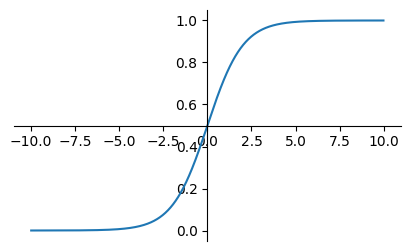

In [101]:
# Logistic Regression은 무조건 exponentialf를 가지고 있음
# 즉 특정(최저, 최고)값을 정하고 그 boundery 안에서 데이터를 표시하게 하기 위해서
# (exponential는 최고 혹은 최저 값을 넘어가 버림)

plt.figure(figsize=(5,3))

ax = plt.gca()

ax.plot(z, g)
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')


#### Read Data

In [148]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/'+\
'master/dataset/wine.csv'

wine_dt = pd.read_csv(wine_url, index_col= 0)

wine_dt.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [149]:
wine_dt['taste'] = [1. if grade>5 else 0. for grade in wine_dt['quality']]

In [150]:
X = wine_dt.drop(['taste' , 'quality'] ,axis=1) # 결과값이 영향을 미치는 모든 변수
y = wine_dt['taste'] # 결과값

#### Regression

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [151]:
X_train,X_test,y_train,y_test = train_test_split(X , y ,test_size= 0.2, random_state= 12)

In [107]:
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
lr_model = LogisticRegression(solver='liblinear' , random_state= 12)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=12, solver='liblinear')

In [108]:
# test dataset으로 결과값 예측
y_pred_test = lr_model.predict(X_test)

In [109]:
# 실제 결과값과 예측 결과값 비교
print('Train으로 학습시킨 모델의 결과 예측 정확도' , accuracy_score(y_test, y_pred_test))

Train으로 학습시킨 모델의 결과 예측 정확도 0.7376923076923076


In [110]:
PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/'+\
'dataset/diabetes.csv'

PIMA_dt = pd.read_csv(PIMA_url)
PIMA_dt.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [111]:
PIMA_dt = PIMA_dt.astype('float')
PIMA_dt.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


In [119]:
replace_features = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'BMI']
PIMA_dt[replace_features] = PIMA_dt[replace_features].replace(0 , PIMA_dt[replace_features].mean())

In [120]:
PIMA_dt.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.331190,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,-0.038147,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.286469,0.535703,0.154961,0.026423,0.175026
Insulin,-0.073535,0.331190,-0.038147,0.286469,1.000000,0.185365,0.185071,-0.042163,0.130548
BMI,0.021546,0.231478,0.281231,0.535703,0.185365,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.185071,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,-0.042163,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.130548,0.312254,0.173844,0.238356,1.000000


<Axes: >

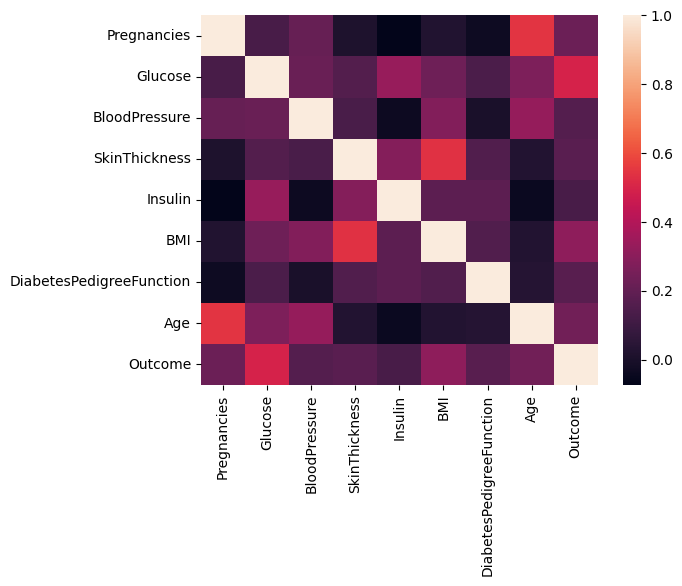

In [121]:
sns.heatmap(PIMA_dt.corr())

In [129]:
X = PIMA_dt.drop(['Outcome'], axis= 1)
y = PIMA_dt['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state= 12)

In [133]:
len(y_train)

614

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


estimators = [('scaler' , StandardScaler()),
              ('clf' , LogisticRegression(solver='liblinear', random_state= 13))]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [143]:
pred = pipe_lr.predict(X_test)

In [144]:
print(round(accuracy_score(y_test, pred)*100 ,2),'%')

81.17 %


In [147]:
pipe_lr['clf'].coef_[0]

array([ 0.3907929 ,  1.08934115, -0.11368304, -0.07230419, -0.03819615,
        0.65871562,  0.33486218,  0.11601403])

In [153]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
Kfold = KFold(n_splits=5)
dectree_model = DecisionTreeClassifier(max_depth=2, random_state=1)

In [175]:
validation_index = 0
for train_idx, test_idx in Kfold.split(X):
    validation_index += 1
    print(f'{validation_index} fold | X_train: {len(train_idx)} X_test: {len(test_idx)}')


1 fold | X_train: 5197 X_test: 1300
2 fold | X_train: 5197 X_test: 1300
3 fold | X_train: 5198 X_test: 1299
4 fold | X_train: 5198 X_test: 1299
5 fold | X_train: 5198 X_test: 1299


In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import *
skfold = StratifiedKFold(n_splits=5)
cross_val_score(dectree_model, X, y, scoring=None , cv=skfold,retur)

array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595])

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)